# Distribuciones de frecuencias condicionales

Las distribuciones de frecuencias condicionales (**CFD** por sus siglas en inglés) son una colección de distribuciones de frecuencia, cada una corresponde a una condición diferente.

En el caso de NLTK, las condiciones en una CFD corresponden a la categoría del texto. Por ejemplo, si quisieramos contar las veces que alguna palabra aparece en determinada categoría de texto tendríamos algo así:

![CFD_intro.png](img/CFD_intro.png)

La diferencia entre una distribución de frecuencia y una CFD es que para la primera, contamos el número de veces que un evento se presenta (por ejemplo, una palabra en un texto), mientras que para la segunda tenemos que procesar pares, el primer elemento corresponde a la condición, el segundo al evento.

Por ejemplo, si en lugar de contar cuantas veces aparece una palabra en un texto, quisieramos saber cuantas veces aparece una palabra en determinado género literario, usaríamos una CFD de la siguiente forma:

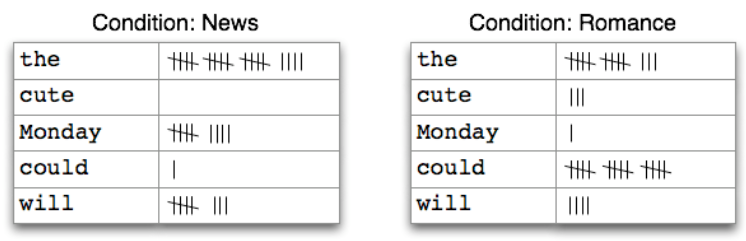

In [1]:
import nltk
from nltk.corpus import brown

In [2]:
# Todas las palabras que hay en cada una de las categorías
cfd = nltk.ConditionalFreqDist((genre, word) # (CondiciónACumplir, Evento)
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))
# Longitud del tabulador
len(cfd)

15

Para simplificar un poco, regresemos al ejemplo con los géneros de "news" y "romance"

In [3]:
# Las palabras que existen en los géneros seleccionados
genre_word = [(genre, word)
             for genre in ['news', 'romance']
             for word in brown.words(categories=genre)]
# Longitud de las palabras
len(genre_word)

170576

In [4]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

<ConditionalFreqDist with 2 conditions>

In [5]:
cfd.conditions()

['news', 'romance']

Podemos accedeer a cada una de las condiciones y ver que en efecto, cada una es una distribución de frecuencias

In [6]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [7]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

Una de las características más intersantes de las CFD es que pueden ayudar a generar gráficas y tablas para hacer un EDA del texto. 

Por ejemplo, el siguiente código va a generar una lista de pares donde el primer elemento será 'america' o 'citizen' y el segundo será el año. Esto lo podemos lograr porque los nombres de los archivos en el corpus "Inaugural" comienzan con el año en que se dió el discurso.


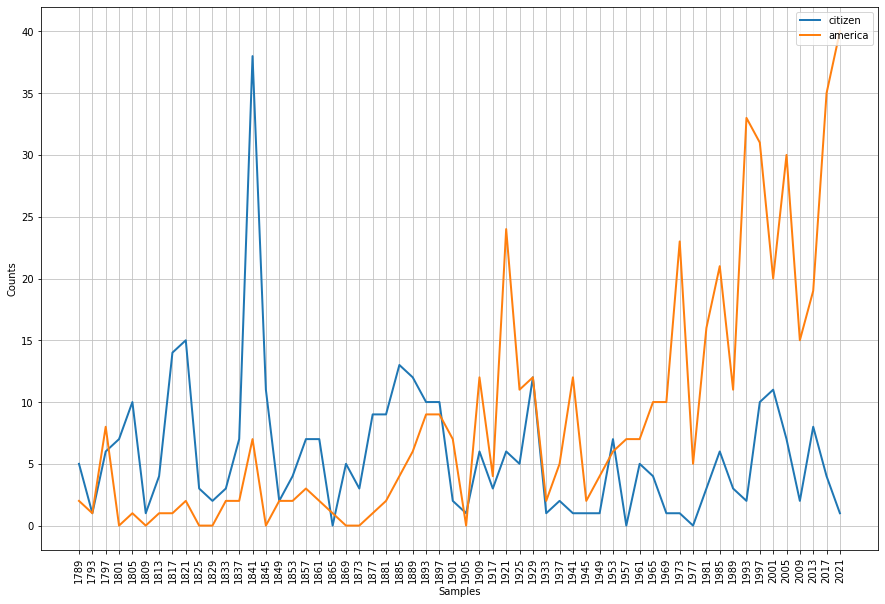

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
import matplotlib.pyplot as plt
from nltk.corpus import inaugural

plt.figure(figsize=(15,10))
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen'] 
                               if w.lower().startswith(target))
cfd.plot()

En el siguiente ejemplo, usamos las CFD para ver que tan largas son la mayoría de las palabras en ciertos idiomas.

Para ello, usamos el corpus "UHDR" 

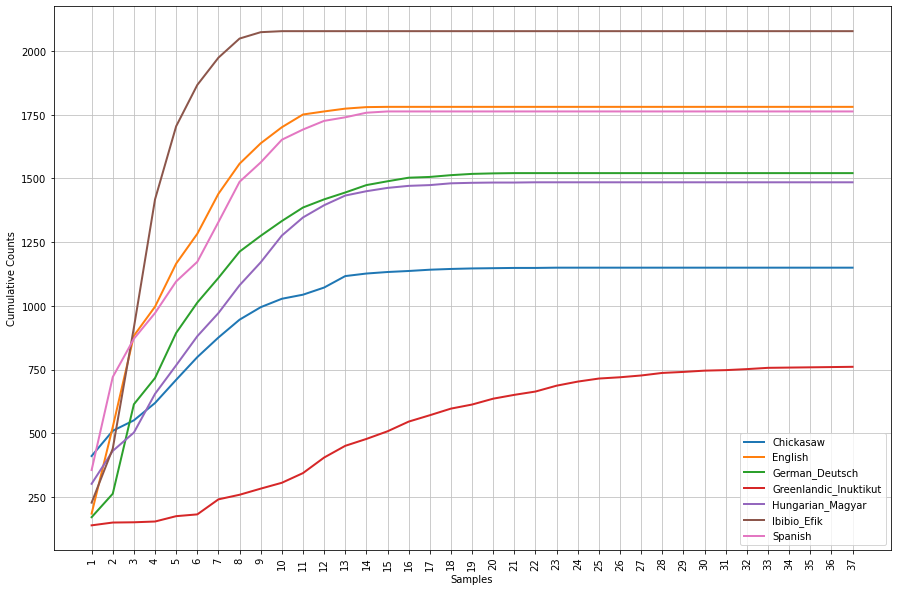

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [11]:
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik','Spanish']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))

plt.figure(figsize=(15,10))
cfd.plot(cumulative=True)

In [12]:
# Para mayor claridad lo ponemos en una tabla y comparamos inglés y español
cfd.tabulate(conditions=['English', 'Spanish'], samples=range(10), cumulative=True)

# Este resultado muestra que, por ejemplo, en Español, 1563 palabras tienen 9 letras o menos, mientras que en Inglés son 1638 palabras con 9 letras o menos

           0    1    2    3    4    5    6    7    8    9 
English    0  185  525  883  997 1166 1283 1440 1558 1638 
Spanish    0  356  721  871  972 1096 1173 1329 1487 1563 
